# Introduction

Notre analyse portera sur une base de données contenant 6000 vins.<br>
Chaque vin est décrit par 11 de ses propriétés chimiques. <br>
Enfin chaque vin a une note qui est le fruit de l'avis d'un panel d'expert.

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

# Récupération des données

Nous récupérons les données sur les vins avec leurs notes fournies par ...

## Utilities

In [2]:
def read(name):
    return pd.read_csv("data/"+name+".csv", sep=";")

## Récupération des données et fusion 

In [3]:
# Récupération des données CSV
whites = read("winequality-white")
reds = read("winequality-red")

# Ajout de la colonne pour la couleur du vin (Rouge = 0 et Blanc = 0)
reds["color"] = pd.Series(0, index=reds.index)
whites["color"] = pd.Series(1, index=whites.index)

# Création d'un dataframe de tous les vins
wines = reds.append(whites, ignore_index=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,0
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,0
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,0


# Statistiques descriptives

## Distinction chimique entre vin rouge et blanc

Nous allons mettre évidence les distinctions chimiques entre vins rouges et vins blanc.
Pour cela, nous comparons les moyennes empiriques de chacune des features.

<IPython.core.display.Javascript object>


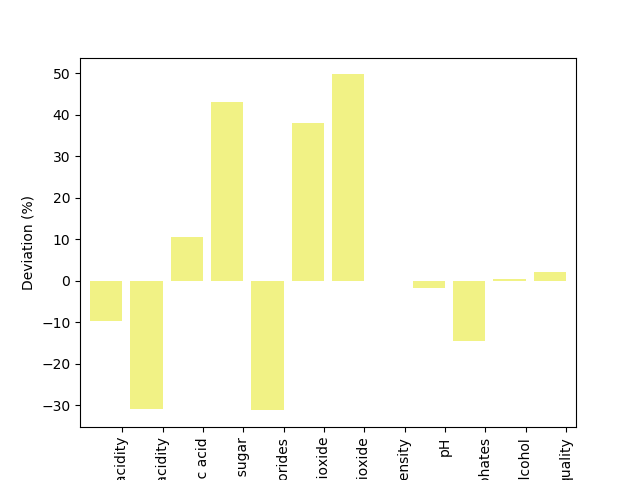

In [27]:
wines_mean = (whites.mean() + reds.mean())*0.5
whites_feats = (whites.mean()/wines_mean - 1)*100

fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.8

whites_feats.drop("color").plot(kind='bar', color='#f1f285', ax=ax, width=width, position=1)
ax.set_ylabel('Deviation (%)')
plt.show()

In [6]:
wines.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'color'], dtype=object)

Ce graphe illustre les divergences entre vin blanc et rouge. Ici c'est le vin blanc qui est tracé. Le vin rouge étant ce même graphe avec des valeurs négatives.
On peut constater que les vins différent très peu en taux d'alcool. Ils se distinguent dans leurs taux de sucrees, chlorides et de sulfur dioxide à plus de 30%.

# Machine learning - Classification supervisée

## Utilities

Pour faire nos classifications nous utiliserons des classes pour nous permettre de tester rapidement divers modèle sur notre base de données.

__ClassifierTester :__<br>
Cette classe permet de tester à la suite plusieurs modèle sur une base de données splittés spécifiques. Elle retourne des classifierScore pour chaque test et les stocke.

__ClassifierScore :__<br>
Cette classe stocke le résultat de la classification. Elle conserve la base sur laquelle la classification a été effectuée et le score. Elle permet d'afficher proprement les résultats de tous les tests pour le classifierTester.

__ClassifierTester :__<br>
Cette classe permet de réaliser n test de plusieurs classifiers. L'objectif est de déterminer quelle classifier sont les plus stables et les plus éfficaces.<br>
Elle permet aussi de mettre en cache les calculs précédents. Cela évite de recalculer à chaque fois les n classifications. 

### ClassifierTester

In [90]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from boruta_py import BorutaPy


from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier



#
#   Classe permettant de tester rapidement sur une base une série de classifiers.
#
class ClassifierTester:
    
    # Les classifiers que l'on souhaite tester
    clfs_name = [\
                "RandomForestClassifier",
                #"RandomForestRegressor",
                "SGDClassifier",
                "ExtraTreeClassifier",
                "RidgeClassifier",
                "SVC", 
                "KNeighborsClassifier",
                "AdaBoostClassifier",
                "GradientBoostingClassifier"
           ]    
    
    # A l'initialisation récupère les données et les splits.
    def __init__(self, data, col):
        self.data = data # Base de données
        self.col = col # Colonne à prédire
        self.scores = {} # Stocke les résultats des différents classifiers
        
        self._split_normalize_data() # Split et normalise les date
 
#
#   Fonctions privées d'analyses des données
#
        
    # Split les datas en deux set de train et de test.
    # Normalise ensuite les sets sur le set de train.
    def _split_normalize_data(self):
        # Reset results
        self.scores = {}
        
        # Split datas
        train, test = train_test_split(self.data)    

        # Split X, Y
        self.train_X, self.train_Y = train.drop(self.col, 1), train[self.col]
        self.test_X, self.test_Y = test.drop(self.col, 1), test[self.col]
        
        # Normalizing      
        # Très important de mettre le test avant !!!!!!
        # car train_x ne doit pas etre encore normalisé pour normalisé test_x (sinon on soustrait juste par 1)
        self.test_X = (self.test_X - self.train_X.mean())/self.train_X.std()
        self.train_X = (self.train_X - self.train_X.mean())/self.train_X.std()
    
        
        return self
        

    # Test un classifier (clf) sur les features (feat_selector) de la base de données.
    # Retourne un ClassifierScore
    def _test(self, clf, feat_selector = None, suffixe = ""):
        
        # Recupere le nom des colonnes selectionnées
        if feat_selector is None:
            feats_selected = self.train_X.columns
        else:
            feats_selected = [i for indx,i in enumerate(self.train_X.columns) if feat_selector[indx]]
        
        # Train le classifier sur les feats_selected
        selected_train = self.train_X[feats_selected]
        clf.fit(selected_train,self.train_Y)

        # Crée et stocke le score du classifier
        score = ClassifierScore(clf, feats_selected, self.test_X, self.test_Y, suffixe)
        self.scores[score.name] = score
        return score
    
    
    # Retourne les features optimisés pour le classifier (clf)
    # Avec la méthode de boruta (ne marche que sur des sklearn.ensemble)
    # WARNING -> C'est assez long ! (1-2 minutes par classifieur)
    def _boruta_selector(self, clf):
        feat_selector = BorutaPy(clf, n_estimators=100, verbose=0, random_state=1)
        feat_selector.fit(self.train_X.values, self.train_Y.ravel())
        return feat_selector.support_
    
    def _has_boruta(self, clf):
        return ("RandomForest" in str(type(clf)))
 


#
#  Fonctions d'interface
#
    
    # Test un classifier avec la boruta si démandée et si possible.
    # Retourne un ClassifierScore
    def test(self, clf, boruta = False):
        
        # Test simple avec toutes les features
        score = self._test(clf)
        
        # Essaie de faire une boruta si demandés.
        if boruta and self._has_boruta(clf):
            try:
                # On rajoute le suffixe pour que la boruta n'écrase pas l'autre score
                score = self._test(clf, self._boruta_selector(clf), "_Boruta")
            except:
                print("Boruta failed...")
        
        return score
        
    
    
    # Test tous les classifiers en réserve
    def full_test(self, clfs_name = None, boruta = False):
        # Valeur par default des classifieurs à tester.
        if clfs_name == None : clfs_name =  self.__class__.clfs_name
        
        # Test tous les classifiers
        for clf_name in clfs_name:
            clf = eval(clf_name + "()") # Crée le classifier
            self.test(clf, boruta = boruta) # Test le classifier et stocke le résultat
        
        return self
    
    def get_dict_score(self):
        res = {}
        for key, value in self.scores.items():
            res[key] = value.score
        return res
        
    
    
#
#  Fonctions d'affichage
#      

    # Affiche tous les scores stockés
    def __str__(self):
        s = ""
        for name, score in self.scores.items():
            s += str(score) + "\n"
        return s
    
    def __repr__(self):
        return self.__str__()
    
#
#  Fonctions utiles
#

    def __getitem__(self, key):
        if key not in self.scores:
            raise ValueError("'"+key+"'is not in the score !")
        return self.scores[key]

### ClassifierScore

La principale fonctionalitée de cette classe est d'utiliser la fonction \__str__. Cela permet d'afficher rapidement les résultats pour du ClassifierTester.<br>
Elle n'est pour l'instant pas très complexe mais pourra être facilement améliorer pour d'autres projets.

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

class ClassifierScore:
    
    def __init__(self, clf, feats_selected, X, Y, suffixe = ""):
        self.clf = clf
        self.feats_selected = feats_selected
        self.X = X
        self.X_selected = self.X[feats_selected]
        self.Y = Y
        self.Y_pred = clf.predict(self.X_selected)
        self.name = str(type(self.clf).__name__) + str(suffixe)
        
        self.feats_removed = [c for c in X.columns if (c not in feats_selected)]
        
        self._compute()
        
    # Calcule les scores
    def _compute(self):
        self.score_random = 1/self.Y.nunique()
        self.score = self.clf.score(self.X_selected, self.Y)
        self.score_diff = (self.score/self.score_random) - 1
        
        print(self.name + " computed ! ("+self._to_per(self.score)+")")
        
    def cross_validation(self):
        return confusion_matrix(self.Y, self.Y_pred)
        
#
#  AFFICHAGE
#      
    def __str__(self):
        res = "Résultat pour " + self.name + "\n"
        res += "Score minimum significatif : " + self._to_per(self.score_random) + "\n"
        res += "Score de la classification : " + self._to_per(self.score) + "\n"
        res += "Amélioration de " + self._to_per(self.score_diff) + "\n"
        res += "Colonne éliminée : " +  ("Aucune" if len(self.feats_removed) == 0 else ", ".join(self.feats_removed)) + "\n"

        return res
    
    def __repr__(self):
        return self.__str__()
    
#
#  Utilities
#
    def _to_per(self, p):
        return str(round(100*p,2)) + "%"  

### NClassifierTester

Cette classe réalise N tests sur tous les classifiers sur une base de données spécifiques. L'objectif est de pouvoir tester mais surtout de stocker les résultats pour qu'à chaque éxecution de l'algorithme le nombre de test augmente.<br>
Elle stocke uniquement le score de chaque test pour chaque classifier sous forme d'un DataFrame.<br>
En résumé, c'est un cache pour les tests.

In [42]:
import pickle
import os

class NClassifierTester:
    folder = "data/" # Dossier où seront stockés les résultats.
        
    # Test n fois tous les classifiers dans clfs
    # name : nom du test (utilisé pour le nom du pickle)
    # data : base de donnée pour les tests
    # column : colonne à prédire
    # n : Nombre de test à effectuer.
    # clfs : Classifiersà tester (par défault ceux du ClassifierTester)
    # boruta : si on utilise l'algo de boruta
    # over : si on remplace le cache
    def test(self, name, data, column, n = 10, clfs = ClassifierTester.clfs_name, boruta = False, over = False):
        # Récupére le cache
        cache = pd.DataFrame() if over else self._load_cache(name)
            
        # Calcul le nombre de test restant à effectué avec le cache     
        n_done = len(cache.index)
        n_todo = n - n_done
        
        if n_todo > 0:
            res = [] # Stocke tous les dictionaires de scores
            # Réalise les n tests
            for i in range(n_todo):   
                print("Iteration : "+ str(i+1) + "/" + str(n_todo))
                tester = ClassifierTester(data, column)
                tester.full_test(clfs, boruta)
                
                scores = tester.get_dict_score()
                res.append(scores.values())
            
            # Fusionne les nouveaux tests dans le dataFrame
            res_df = pd.DataFrame(res, columns = scores.keys())
            cache = cache.append(res_df, ignore_index=True)
        
            # Sauvegarde le cache
            self._save_cache(name, cache)
        
        return cache
            
        
    def _load_cache(self, name):
        path_file = self.__class__.folder + name + ".pickle"
        if os.path.isfile(path_file):
            return pickle.load( open(path_file, "rb" ) )     
        else:
            return pd.DataFrame()
        
    def _save_cache(self, name, cache):
        path_file = self.__class__.folder + name + ".pickle"
        pickle.dump( cache, open(path_file, "wb" ) )
        return self

In [67]:
def show_scores_df(df):
    ms = df.mean().sort_values(ascending = False)*100
    stds = df.std()*100
    
    data = np.array([ms.values, stds[ms.index].values]).transpose()
    
    return pd.DataFrame(data, index = ms.index, columns = ["Moyenne", "Ecart type"])     

## Prédiction de la couleur du vin

On cherche à prédire la couleur du vin à partir de ces caractéristiques chimiques.
Comme vu plus haut le vin blanc se distingue du rouge distinctivement sur plusieurs caractéristiques.
On peut donc s'attendre à un score élévée.

In [88]:
data = wines.drop(["quality"], 1)

NTester = NClassifierTester()
df = NTester.test("origin_base_boruta_color", data, "color", n = 10, boruta = True)
show_scores_df(df)

,Moyenne,Ecart type
SVC,99.606154,0.092649
RidgeClassifier,99.440000,0.151989
GradientBoostingClassifier,99.396923,0.095335
RandomForestClassifier,99.323077,0.150738
AdaBoostClassifier,99.292308,0.145771
KNeighborsClassifier,99.292308,0.148630
SGDClassifier,99.058462,0.365854
ExtraTreeClassifier,97.673846,0.418180


On obtient un score très élévée. La couleur est donc totalement déterminé par les prorpiétés chimiques. Ce qui semble logique.

## Prédiction de la note

On cherche ici à prédire la note attribuée au vin en fonction de ses caractéristiques chimiques.

In [86]:
NTester = NClassifierTester()
df = NTester.test("origin_base_boruta_quality", wines, "quality", n = 10, boruta = True)
show_scores_df(df) 

,Moyenne,Ecart type
RandomForestClassifier_Boruta,68.307692,1.088533
RandomForestClassifier,65.033846,0.719295
ExtraTreeClassifier,58.978462,1.673575
GradientBoostingClassifier,58.375385,1.345804
SVC,56.689231,1.167898
KNeighborsClassifier,55.920000,1.248437
RidgeClassifier,53.083077,1.175225
SGDClassifier,43.538462,5.042755
AdaBoostClassifier,36.172308,5.536927


On plafonne à 67% en éliminant la couleur. Le fait d'éliminer la couleur se justifie par le fait que comme vu plus haut elle est strictement lié à ses propriétés chimiques.

On remarque que dans tous les cas la Random Forest est meilleur. Nous utiliserons donc dans la suite uniquement des Random Forests pour rafiner notre prédiction.

### Détails du score

In [36]:
tester = ClassifierTester(wines, "quality")
score_details = tester.test(RandomForestClassifier(), boruta = True)
score_details

RandomForestClassifier computed !
RandomForestClassifier_Boruta computed !


Résultat pour RandomForestClassifier_Boruta
Score minimum significatif : 14.29%
Score de la classification : 64.86%
Amélioration de 354.03%
Colonne éliminée : color

#### Cross Validation

In [37]:
score_details.cross_validation()

array([[  0,   0,   6,   2,   0,   0,   0],
       [  0,   3,  38,  21,   1,   0,   0],
       [  0,   1, 376, 153,   3,   0,   0],
       [  0,   2, 119, 524,  47,   1,   0],
       [  0,   0,   6, 137, 137,   2,   0],
       [  0,   0,   0,  14,  16,  14,   0],
       [  0,   0,   0,   1,   1,   0,   0]])

Commentaires...

#### Histogramme des notes

<IPython.core.display.Javascript object>


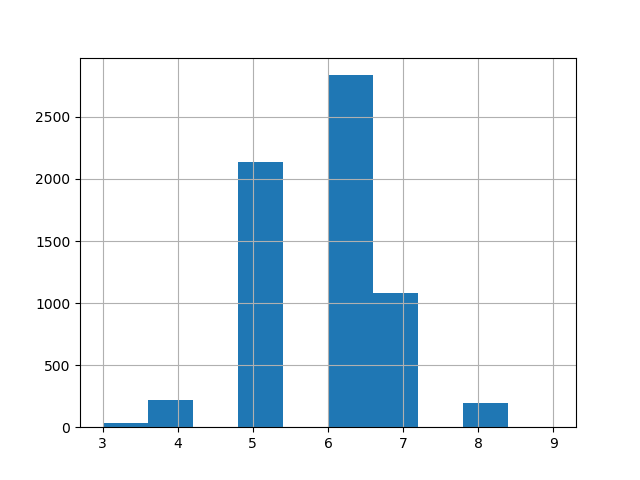

In [26]:
plt.figure()
wines.quality.hist()

On remarque que les notes sont très centrées. Il n'y a que très peu de notes extrèmes.

Le classifier est bon sur le milieu là où il y a beaucoup de vins. Nous allons tacher de montrer qu'il a plus de mal sur les extrèmes car il n'y a pas beaucoup d'échantillons

#### Séparation des vins

In [17]:
quality_exts = [3,4,8,9]
quality_mains = [5,6,7]

wines_ext = wines.loc[wines['quality'].isin(quality_exts)]
wines_mains = wines.loc[wines['quality'].isin(quality_mains)]

#### Prédiction sur les notes moyennes

In [18]:
tester = ClassifierTester(wines_mains, "quality")
tester.test(RandomForestClassifier(), boruta = False)

RandomForestClassifier computed !


Résultat pour RandomForestClassifier
Score minimum significatif : 33.33%
Score de la classification : 67.04%
Amélioration de 101.12%
Colonne éliminée : Aucune

#### Prédiction sur les notes extremes

In [19]:
tester = ClassifierTester(wines_ext, "quality")
tester.test(RandomForestClassifier(), boruta = False)

RandomForestClassifier computed !


Résultat pour RandomForestClassifier
Score minimum significatif : 33.33%
Score de la classification : 81.98%
Amélioration de 145.95%
Colonne éliminée : Aucune

#### Prédiction de la classe des vins

On a remarqué que les classifiers était meilleur lorsque l'on sépare les extremes...

In [20]:
data = wines.copy()
data["quality"] = data.quality.isin(quality_mains)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,True,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,True,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,True,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,True,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,True,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,True,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,True,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,True,0
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,True,0
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,True,0


In [21]:
tester = ClassifierTester(data, "quality")
tester.test(RandomForestClassifier(), boruta = False)

RandomForestClassifier computed !


Résultat pour RandomForestClassifier
Score minimum significatif : 50.0%
Score de la classification : 93.17%
Amélioration de 86.34%
Colonne éliminée : Aucune

Le classifieur arrive à distinguer les notes moyennes des extremes.

### Custom Classifier

L'idée est de créer notre propre classifier. On a remarqué que le RandomForest est plus éfficace sur les sous classes de vins (notes moyennes et extremes).<br>
Ce classifier va regrouper 3 sous classifiers (RandomForest).<br>

__ClassifierBinaire__ :<br>
Classe les vins en deux classes moyens ou extremes.<br>
Il partage l'échantillon et permet ensuite d'appliquer des classifieurs spécialisés.<br>

__ClassifierMains__ :<br>
Donne les notes des vins moyens.

__ClassifierOthers__ :<br>
Donne les notes des vins extremes.

In [22]:
import numpy as np
class WinesClassifier():
    def __init__(self):
        self.quality_mains = [5,6,7]
        
    def fit(self, X, Y):
        Y_bin = Y.isin(self.quality_mains)
        self.bin_clf = RandomForestClassifier()
        self.bin_clf.fit(X, Y_bin)
        
        mains_index = Y.isin(self.quality_mains)
        
        self.clf_mains = RandomForestClassifier()
        self.clf_mains.fit(X.loc[mains_index], Y.loc[mains_index])
        
        self.clf_others = RandomForestClassifier()
        self.clf_others.fit(X.loc[~mains_index], Y.loc[~mains_index])
    
    
    
    # Fonction de prédiction pour un X
    # Etape 1 : Prédit si c'est un vin moyen ou non
    # Etape 2 : Retourne la note prédit par le classifieur spécialisé
    def _predict(self, x):
        if (self.bin_clf.predict(x)):
            return self.clf_mains.predict(x)
        else:
            return self.clf_others.predict(x)
        
        
    
    # C'est une fonction d'interface qui permet de gérer plusieurs types d'entrées
    # (Dataframe, list, numpy array, X)
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            return self.predict(X.values)
        
        elif isinstance(X, list):
            Y = []
            for x in X:
                Y.append(self._predict(x))
            return Y
        
        elif isinstance(X, np.ndarray):
            Y = []
            for x in X:
                Y.append(self._predict(x.reshape(1, -1)))
            return Y
        
        else:
            return self._predict(X)
        
    # Fonction de score
    # Assez longue car on traite chaque X un par un.
    def score(self, X, Y):
        i = 0
        for index, x in X.iterrows():
            y = self.predict(x.values.reshape(1, -1))
            if (y == Y[index]):
                i += 1
        return i/len(X)

In [97]:
NTester = NClassifierTester()
df_custom = NTester.test("origin_base_custom_quality", wines, "quality", n = 20, clfs = ["WinesClassifier"])
show_scores_df(df_custom)

,Moyenne,Ecart type
WinesClassifier,65.470769,1.191252


# Utilisations des corrélations

Nous allosn essayer d'introduire les corrélations

## Ajout des corrélations

Les méthodes de machines learning utilisent des techniques linéaires. Pour tenir compte des effets non linéaires, on ajoute les features de corrélations (produits).

In [4]:
# On copie le tableau pour pouvoir faire des analyses avec et sans les corrélations
wines_c = wines.copy()

# On ne souhaite pas faire de corrélation sur quality et color
cols = wines_c.columns.drop(["quality", "color"])
n_cols = len(cols)

# Ajout des features de corrélations
for i in range(n_cols):
    for j in range(i, n_cols):
        a, b = cols[i], cols[j]
        wines_c[a + "_" + b] = wines_c[a]*wines_c[b]
        
# Affichage des corrélations
print("Nouvelles features de corrélations :")
for i in range(len(wines.columns), len(wines_c.columns)):
    print("\t" + wines_c.columns[i])

Nouvelles features de corrélations :
	fixed acidity_fixed acidity
	fixed acidity_volatile acidity
	fixed acidity_citric acid
	fixed acidity_residual sugar
	fixed acidity_chlorides
	fixed acidity_free sulfur dioxide
	fixed acidity_total sulfur dioxide
	fixed acidity_density
	fixed acidity_pH
	fixed acidity_sulphates
	fixed acidity_alcohol
	volatile acidity_volatile acidity
	volatile acidity_citric acid
	volatile acidity_residual sugar
	volatile acidity_chlorides
	volatile acidity_free sulfur dioxide
	volatile acidity_total sulfur dioxide
	volatile acidity_density
	volatile acidity_pH
	volatile acidity_sulphates
	volatile acidity_alcohol
	citric acid_citric acid
	citric acid_residual sugar
	citric acid_chlorides
	citric acid_free sulfur dioxide
	citric acid_total sulfur dioxide
	citric acid_density
	citric acid_pH
	citric acid_sulphates
	citric acid_alcohol
	residual sugar_residual sugar
	residual sugar_chlorides
	residual sugar_free sulfur dioxide
	residual sugar_total sulfur dioxide
	r

## Prédiction de la note avec les corrélations

In [98]:
NTester = NClassifierTester()
df = NTester.test("corr_base_boruta_quality", wines_c, "quality", n = 3, boruta = True)
show_scores_df(df)

Iteration : 1/1
RandomForestClassifier computed ! (64.37%)
RandomForestClassifier_Boruta computed ! (67.88%)
SGDClassifier computed ! (40.98%)
ExtraTreeClassifier computed ! (59.88%)
RidgeClassifier computed ! (53.54%)


/home/nicolas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SVC computed ! (56.25%)
KNeighborsClassifier computed ! (56.37%)
AdaBoostClassifier computed ! (35.69%)
GradientBoostingClassifier computed ! (58.46%)


,Moyenne,Ecart type
RandomForestClassifier_Boruta,67.384615,0.430769
RandomForestClassifier,64.861538,0.961261
GradientBoostingClassifier,60.451282,1.736577
ExtraTreeClassifier,58.194872,1.606299
SVC,56.676923,0.746114
KNeighborsClassifier,55.938462,1.198026
RidgeClassifier,54.523077,0.887520
SGDClassifier,44.389744,3.195460
AdaBoostClassifier,33.005128,5.141439
